In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [ ]:
#Calculamos el numero total de la población "n"

Amsterdam['review_scores_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['review_scores_value'].max()
Min = Amsterdam['review_scores_value'].min()
Limites = [Min, Max]
Limites

[4.16, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.8399999999999999

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.05903032242270575

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (4.16, 5.0, 15)
intervalos

array([4.16, 4.22, 4.28, 4.34, 4.4 , 4.46, 4.52, 4.58, 4.64, 4.7 , 4.76,
       4.82, 4.88, 4.94, 5.  ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['review_scores_value'] = pd.cut ( x = Amsterdam ['review_scores_value'], bins = intervalos, labels = categorias )
Amsterdam['review_scores_value']

0        Categoria9
1        Categoria9
2        Categoria8
3       Categoria14
4        Categoria5
           ...     
9654     Categoria9
9655     Categoria9
9656    Categoria12
9657     Categoria9
9658     Categoria9
Name: review_scores_value, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['review_scores_value'])
table1

,review_scores_value,frequency,percentage,cumulative_perc
0,Categoria9,2543,0.263278,0.263414
1,Categoria14,1483,0.153536,0.417029
2,Categoria10,1022,0.105808,0.522892
3,Categoria11,834,0.086344,0.609281
4,Categoria8,647,0.066984,0.676300
5,Categoria12,638,0.066052,0.742387
6,Categoria6,596,0.061704,0.804123
7,Categoria7,536,0.055492,0.859644
8,Categoria13,316,0.032716,0.892376
9,Categoria5,309,0.031991,0.924384


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_value,frequency
0,Categoria9,2543
1,Categoria14,1483
2,Categoria10,1022
3,Categoria11,834
4,Categoria8,647
5,Categoria12,638
6,Categoria6,596
7,Categoria7,536
8,Categoria13,316
9,Categoria5,309


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_value')
Filtro_index

,frequency
review_scores_value,
Categoria9,2543
Categoria14,1483
Categoria10,1022
Categoria11,834
Categoria8,647
Categoria12,638
Categoria6,596
Categoria7,536
Categoria13,316


Text(0, 0.5, 'Frecuencia')

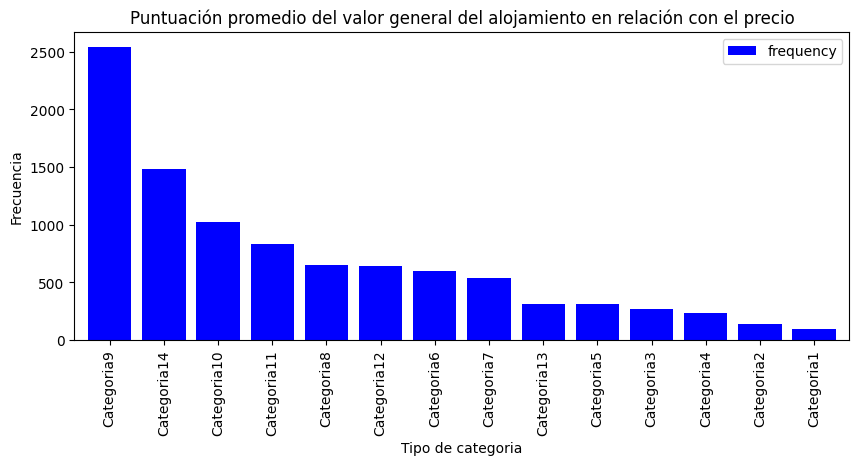

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio del valor general del alojamiento en relación con el precio')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')